<a target="_blank" href="https://colab.research.google.com/github/ProgrammierenNachOFI/Investitionsrechnung/blob/breakeven/docs/break_even/break_even_muloe.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Break Even (Nutzschwelle)

Die Berechnung der Nutzschwelle (Break Even Point) soll am Beispiel von
Mobilitätskosten dargestellt werden. Es werden dazu auf Preise im
Februar 2024 abgestellt.  
Verglichen werden die Kosten eines Kleinwagens mit jenen des
öffentlichen Verkehrs mit einem Halbtax- bzw. Generalabbonement.

Um die Resultate grafisch darstellen zu können, wird auf die Python
Library `matplotlib` abgestellt.

In [1]:
import matplotlib.pyplot as plt


In [2]:
import sympy as sp


Es wäre hilfreich, wenn die entsprechenden Daten in einer Klasse
abgelegt werden könnten.

![Klassendiagramm](images/Klassendiagramm.svg)

In [23]:
class BreakEvenObjekt:
    def __init__(self, 
                 label, 
                 variable_kosten, 
                 fixe_kosten = {'k1': 0}):
        self.fixe_kosten = fixe_kosten
        self.variable_kosten = variable_kosten
        self.total_fixe_kosten = sum(fixe_kosten.values())
        self.total_variable_kosten = sum(variable_kosten.values())
        # Gleichung: f(x) = mx + b
        self.m = self.total_variable_kosten
        self.b = self.total_fixe_kosten
        self.label = label
        
    def break_even_point(self, other):
        x = sp.symbols('x')
        print(f'm: {self.m}, b: {self.b}')
        gleichung = sp.Eq(self.m * x + self.b, other.m * x + other.b)
        
        return sp.solve(gleichung, x)

    def plot(self, other):
        x = [i for i in range(0, 10_000)]
        y = [self.m * i + self.b for i in x]
        a = [other.m * i + other.b for i in x]
        plt.plot(x, y, label=self.label)
        plt.plot(x, a, label=other.label)
        plt.title(f'{self.label} gegen {other.label}')
        plt.legend()
        plt.show()

m: 0.45, b: 190
[760.000000000000]


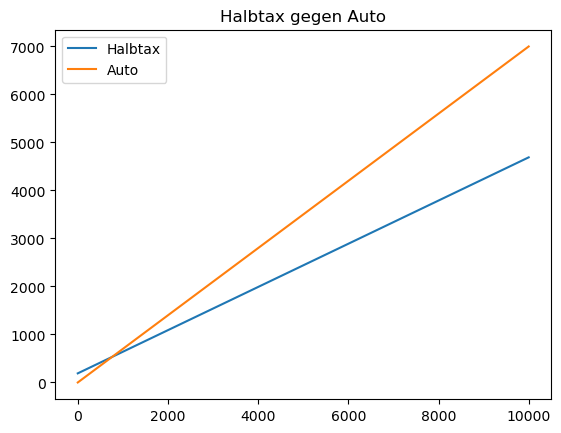

In [24]:
test_variable_kosten = {'k1': 0.45}
test_fixe_kosten = {'k1': 190}
halbtax = BreakEvenObjekt('Halbtax', test_variable_kosten, test_fixe_kosten)
test2_variable_kosten = {'k1': 0.7}
test2_fixe_kosten = {'k1': 0}
auto = BreakEvenObjekt('Auto', test2_variable_kosten, test2_fixe_kosten)

print(halbtax.break_even_point(auto))

halbtax.plot(auto)

## Halbtax

Strecke St. Gallen - Genf

| Stichwort | Preis |
| :--- | ---: |
| Kaufpreis | 190 |
| Billet | 113 |
| Distanz | 360 |

Strecke Basel - Chiasso

| Stichwort | Preis |
| :--- | ---: |
| Kaufpreis | 190 |
| Billet | 96 |
| Distanz | 290 |

| Stichwort | Preis |
| :--- | ---: |
| Kaufpreis | 190 |
| Tarifkilometer | 0.35 |

| Stichwort | Preis |
| :--- | ---: |
| Kaufpreis | 0 |
| Tarifkilometer | 0.70 |
| Distanz | 360 |

In [ ]:
variabel_halbtax = {"tarifkilometer" : 0.35}
fix_halbtax = {"abonnement" : 190}

x = [i for i in range(0, 10_000)]
y = [0.45 * i + 190 for i in x]
a = [0.71 * i for i in x]
plt.plot(x, y, label="Halbtax")
plt.plot(x, a, label="Auto")
plt.legend()
plt.show()

In [3]:
x = sp.symbols('x')
gleichung = sp.Eq(0.45 * x + 190, 0.71 * x)
loesung = sp.solve(gleichung, x)
print(loesung)

[730.769230769231]


In [5]:
test = 0.45
gleichung2 = sp.Eq(test * x + 190, 0.71 * x)